<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Aproximaci%C3%B3n_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO 1**. Defina las variables que intervienen en el modelo.

$x$ : cordenada en [0, 1]

$y$ : cordenada en [0, 1]

**PASO 2**. Formule la distribución de probabilidad de cada variable.

|   $v$   | $x ∼ U(0,1)$ | $y ∼ U(0,1)$ |
|------|-------|----------|
|f(v)|  $$1$$ |  $$1$$  |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|  $v$  | $x ∼ U(0,1)$ | $y ∼ U(0,1)$ |
|------|-------|----------|
|$$f(v)$$|  $$1$$ |  $$1$$  |
|$$F(v)$$|  $$x$$ |  $$y$$  |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|  $v$ | $x ∼ U(0,1)$ | $y ∼ U(0,1)$ |
|------|-------|----------|
|$$f(v)$$|  $$1$$ |  $$1$$  |
|$$F(v)$$|  $$x$$ |  $$y$$  |
|intervalo|  $$[0,1]$$ |  $$[0,1]$$  |

**PASO 5**. Genere números aleatorios.

In [43]:
from random import random
x = random()
y = random()

**PASO 6**. Simule un lanzamiento.

Si $x^2 + y^2 <= 1 ⇒ $ Acierto

Si $x^2 + y^2 > 1 ⇒ $ Fallo


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from numba import jit

In [45]:
@jit(nopython = True)
def aprox_pi(n):
  r = np.random.random((2, n))
  lista = list(r[0]**2 + r[1]**2 <= 1)

  lista_pi = []
  for i in range(1,n+1):
    lista_pi.append(4*(lista[:i].count(True))/i)
  return lista_pi

In [46]:
l_pi = aprox_pi(100000)
print(l_pi[-1])

3.14736


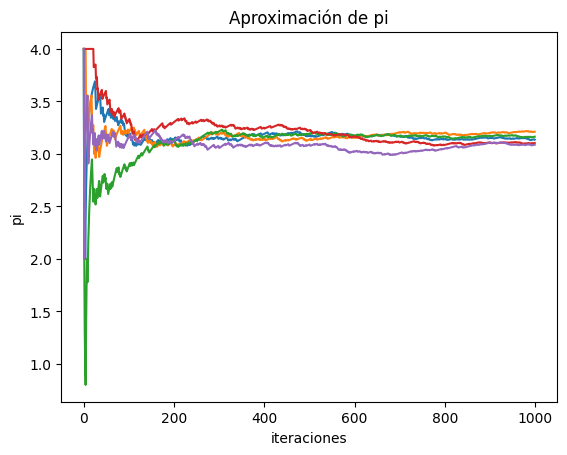

In [142]:
for i in range(5):
  l_pi = aprox_pi(1000)
  plt.plot(l_pi)

plt.xlabel('iteraciones')
plt.ylabel('pi')
plt.title('Aproximación de pi')
plt.show()

Como se puede apreciar al ejecutar varias veces el la celda de código anterior, el estado transitorio se encuentra antes de las 600 iteraciones.

Mientras que el estado estable se puede apreciar a partir de las 600 iteraciones en la mayoría de los casos.

**PASO 8**. Replique el modelo.

In [48]:
@jit(nopython = True)
def repeticiones(n, m):
  lista_repeticiones = []
  for i in range(1,n+1):
    pi = np.array(aprox_pi(m))
    lista_repeticiones.append(pi.mean())
  return lista_repeticiones

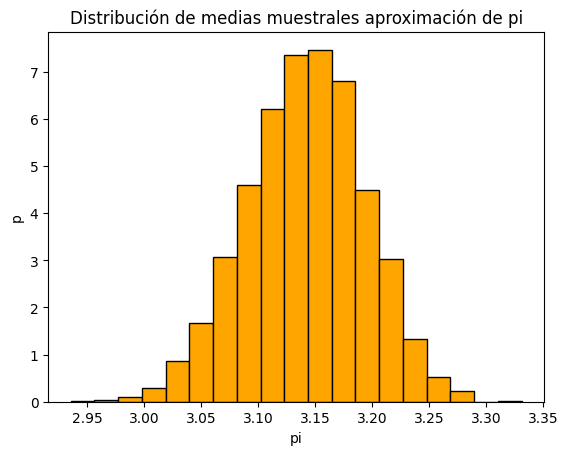

In [49]:
rep = 7000
n = 2000
l = repeticiones(rep, n)

plt.hist(l, bins = 19, color = "orange", edgecolor = "k", density = True)
plt.xlabel('pi')
plt.ylabel('p')
plt.title('Distribución de medias muestrales aproximación de pi')
plt.show()

**PASO 9**. Calcule la una aproximación al número pi, así como la variación de las aproximaciones

In [52]:
med = np.mean(l)
var = np.var(l, ddof=1)
desv = np.std(l, ddof=1)

print(f"pi(aprox) = media = {med}")
print(f"varianza = {var}")
print(f"deviación estandar = {desv}\n")

pi(aprox) = media = 3.1419692444857312
varianza = 0.002649411727805809
deviación estandar = 0.05147243658314427



**PASO 10**. Halle el intervalo de confianza de la aproximación del npumero pi ($π$) con un nivel de confianza del $95 \%$.

In [51]:
z = norm.ppf(0.975)
print(f'Un intervalo de confianza del 95% es [{med - z*desv/np.sqrt(n)}, {med + z*desv/np.sqrt(n)}]')

Un intervalo de confianza del 95% es [3.139713406941555, 3.1442250820299074]
